In [230]:
install.packages('RCurl', quiet=TRUE)
install.packages('dplyr', quiet=TRUE)
install.packages('explore', quiet=TRUE)
install.packages('ggplot2', quiet=TRUE)
install.packages('cusp', quiet=TRUE)
install.packages('zoo', quiet=TRUE)

library(lubridate)
library(zoo)
library(RCurl)
library(dplyr)
library(explore)
library(ggplot2)
library(cusp)

In [244]:
#importing a csv file
df_canada <- read.csv(text = getURL("https://raw.githubusercontent.com/ush/MACE_NIS/main/HOUSE_PRICES_06102021214439215.csv"))
df_prices <- read.csv(text = getURL("https://raw.githubusercontent.com/ush/MACE_NIS/main/HOUSE_PRICES_1970-2013_Q.csv"))
df_intrest <- read.csv(text = getURL("https://raw.githubusercontent.com/ush/MACE_NIS/main/LONG_TERM_INTREST_RATES_1970-2013_Q.csv"))

In [245]:
unique(df_prices$Unit)

[1] "RATIOS" "Index"

In [246]:
df_prices <- subset(df_prices, select = -c(PowerCode.Code, IND, Country, Unit.Code, Unit, PowerCode.Code, PowerCode, Reference.Period.Code, Reference.Period, Flag.Codes, Flags, Time))

In [247]:
df_real_prices <- df_prices[df_prices$Indicator =="Real house price indices, s.a.",]
df_nominal_prices <- df_prices[df_prices$Indicator =="Nominal house price indices, s.a.",]
df_rent_prices <- df_prices[df_prices$Indicator =="Rent prices, s.a.",]
df_price_rent_ratio <- df_prices[df_prices$Indicator =="Price to rent ratio",]

In [248]:
df_real_prices %>% head()
df_nominal_prices %>% head()
df_rent_prices %>% head()
df_price_rent_ratio %>% head()

,COU,Indicator,TIME,Value
,<chr>,<chr>,<chr>,<dbl>
177,USA,"Real house price indices, s.a.",1970-Q1,55.38473
178,USA,"Real house price indices, s.a.",1970-Q2,55.18501
179,USA,"Real house price indices, s.a.",1970-Q3,55.68034
180,USA,"Real house price indices, s.a.",1970-Q4,55.93275
181,USA,"Real house price indices, s.a.",1971-Q1,56.47625
182,USA,"Real house price indices, s.a.",1971-Q2,57.37419


,COU,Indicator,TIME,Value
,<chr>,<chr>,<chr>,<dbl>
461,SWE,"Nominal house price indices, s.a.",1970-Q1,5.338914
462,SWE,"Nominal house price indices, s.a.",1970-Q2,5.423867
463,SWE,"Nominal house price indices, s.a.",1970-Q3,5.513082
464,SWE,"Nominal house price indices, s.a.",1970-Q4,5.592534
465,SWE,"Nominal house price indices, s.a.",1971-Q1,5.618274
466,SWE,"Nominal house price indices, s.a.",1971-Q2,5.704800


,COU,Indicator,TIME,Value
,<chr>,<chr>,<chr>,<dbl>
1125,GBR,"Rent prices, s.a.",1970-Q1,4.025914
1126,GBR,"Rent prices, s.a.",1970-Q2,4.127336
1127,GBR,"Rent prices, s.a.",1970-Q3,4.204735
1128,GBR,"Rent prices, s.a.",1970-Q4,4.298507
1129,GBR,"Rent prices, s.a.",1971-Q1,4.382236
1130,GBR,"Rent prices, s.a.",1971-Q2,4.512322


,COU,Indicator,TIME,Value
,<chr>,<chr>,<chr>,<dbl>
813,USA,Price to rent ratio,1970-Q1,93.33491
814,USA,Price to rent ratio,1970-Q2,91.71699
815,USA,Price to rent ratio,1970-Q3,91.79081
816,USA,Price to rent ratio,1970-Q4,91.78371
817,USA,Price to rent ratio,1971-Q1,93.38022
818,USA,Price to rent ratio,1971-Q2,95.94403


In [249]:
df_real_us <- df_real_prices[df_real_prices$COU == "USA",]
df_nominal_us <- df_nominal_prices[df_nominal_prices$COU == "USA",]
df_ratio_us <- df_price_rent_ratio[df_price_rent_ratio$COU == "USA",]
df_rent_us <- df_rent_prices[df_rent_prices$COU == "USA",]

df_real_us$TIME = as.Date(as.yearqtr(df_real_us$TIME, format = "%Y-Q%q"))
df_ratio_us$TIME = as.Date(as.yearqtr(df_ratio_us$TIME, format = "%Y-Q%q"))
df_rent_us$TIME = as.Date(as.yearqtr(df_rent_us$TIME, format = "%Y-Q%q"))

#df_rent_us$Value <- df_rent_us$Value * exp(2 - year(df_rent_us$TIME)*0.001)
r_rf = 2.99
r = r_rf + 1.5
alpha = 5.5
g = 6.92
coef = (1 + r_rf)/(r + alpha - g)
df_real_us[, "Fundam"] = coef*(df_rent_us$Value)

In [256]:
df_real_can <- df_canada[df_canada$Indicator =="Real house price indices, s.a.",]
df_nominal_can <- df_canada[df_canada$Indicator =="Nominal house price indices, s.a.",]
df_rent_can <- df_canada[df_canada$Indicator =="Rent prices, s.a.",]

df_real_can$TIME = as.Date(as.yearqtr(df_real_can$TIME, format = "%Y-Q%q"))
df_nominal_can$TIME = as.Date(as.yearqtr(df_nominal_can$TIME, format = "%Y-Q%q"))
df_rent_can$TIME = as.Date(as.yearqtr(df_rent_can$TIME, format = "%Y-Q%q"))

In [257]:
df_rent_can %>% describe()
df_real_can %>% describe()

variable,type,na,na_pct,unique,min,mean,max
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
COU,chr,0,0,1,NA,NA,NA
Country,chr,0,0,1,NA,NA,NA
IND,chr,0,0,1,NA,NA,NA
Indicator,chr,0,0,1,NA,NA,NA
TIME,dat,0,0,176,NA,NA,NA
Time,chr,0,0,176,NA,NA,NA
Unit.Code,chr,0,0,1,NA,NA,NA
Unit,chr,0,0,1,NA,NA,NA
PowerCode.Code,int,0,0,1,0.00,0.00,0


variable,type,na,na_pct,unique,min,mean,max
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
COU,chr,0,0,1,NA,NA,NA
Country,chr,0,0,1,NA,NA,NA
IND,chr,0,0,1,NA,NA,NA
Indicator,chr,0,0,1,NA,NA,NA
TIME,dat,0,0,176,NA,NA,NA
Time,chr,0,0,176,NA,NA,NA
Unit.Code,chr,0,0,1,NA,NA,NA
Unit,chr,0,0,1,NA,NA,NA
PowerCode.Code,int,0,0,1,0.00,0.00,0.00


In [264]:
r_rf = 3.5
r = r_rf + 1
alpha = 4
g = 2.3
coef = (1 + r_rf)/(r + alpha - g)
df_real_can[, "Fundam"] = coef*(df_rent_can$Value)

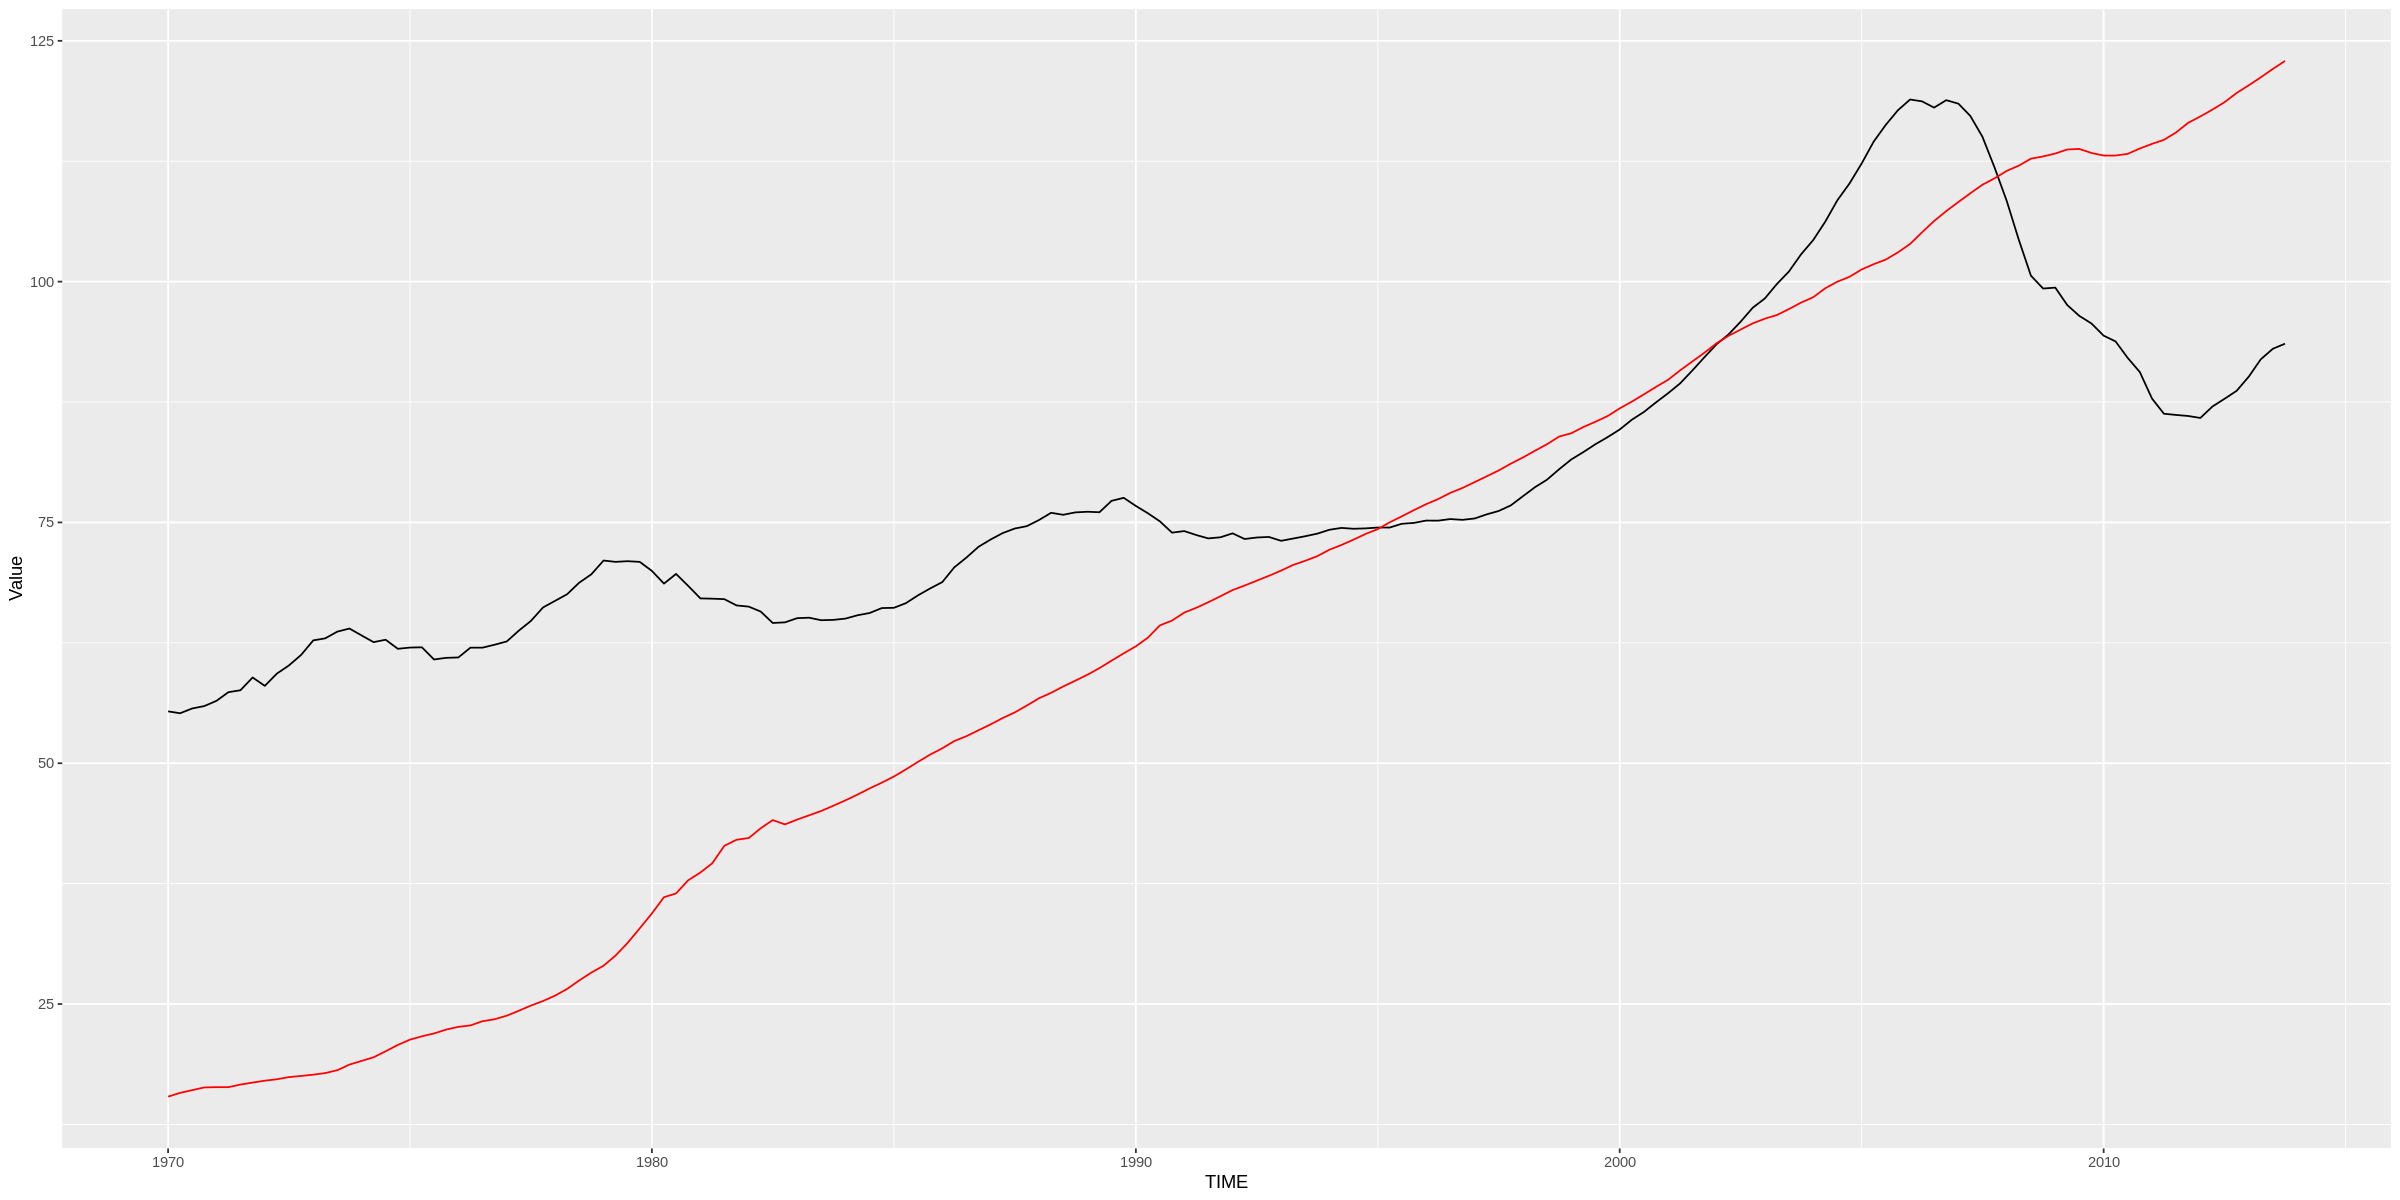

In [265]:
options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(df_real_us, aes(x = TIME, y = Value)) + geom_line(colour = "black") + geom_line(aes(x = TIME, y = Fundam), color = "red") + scale_x_date()

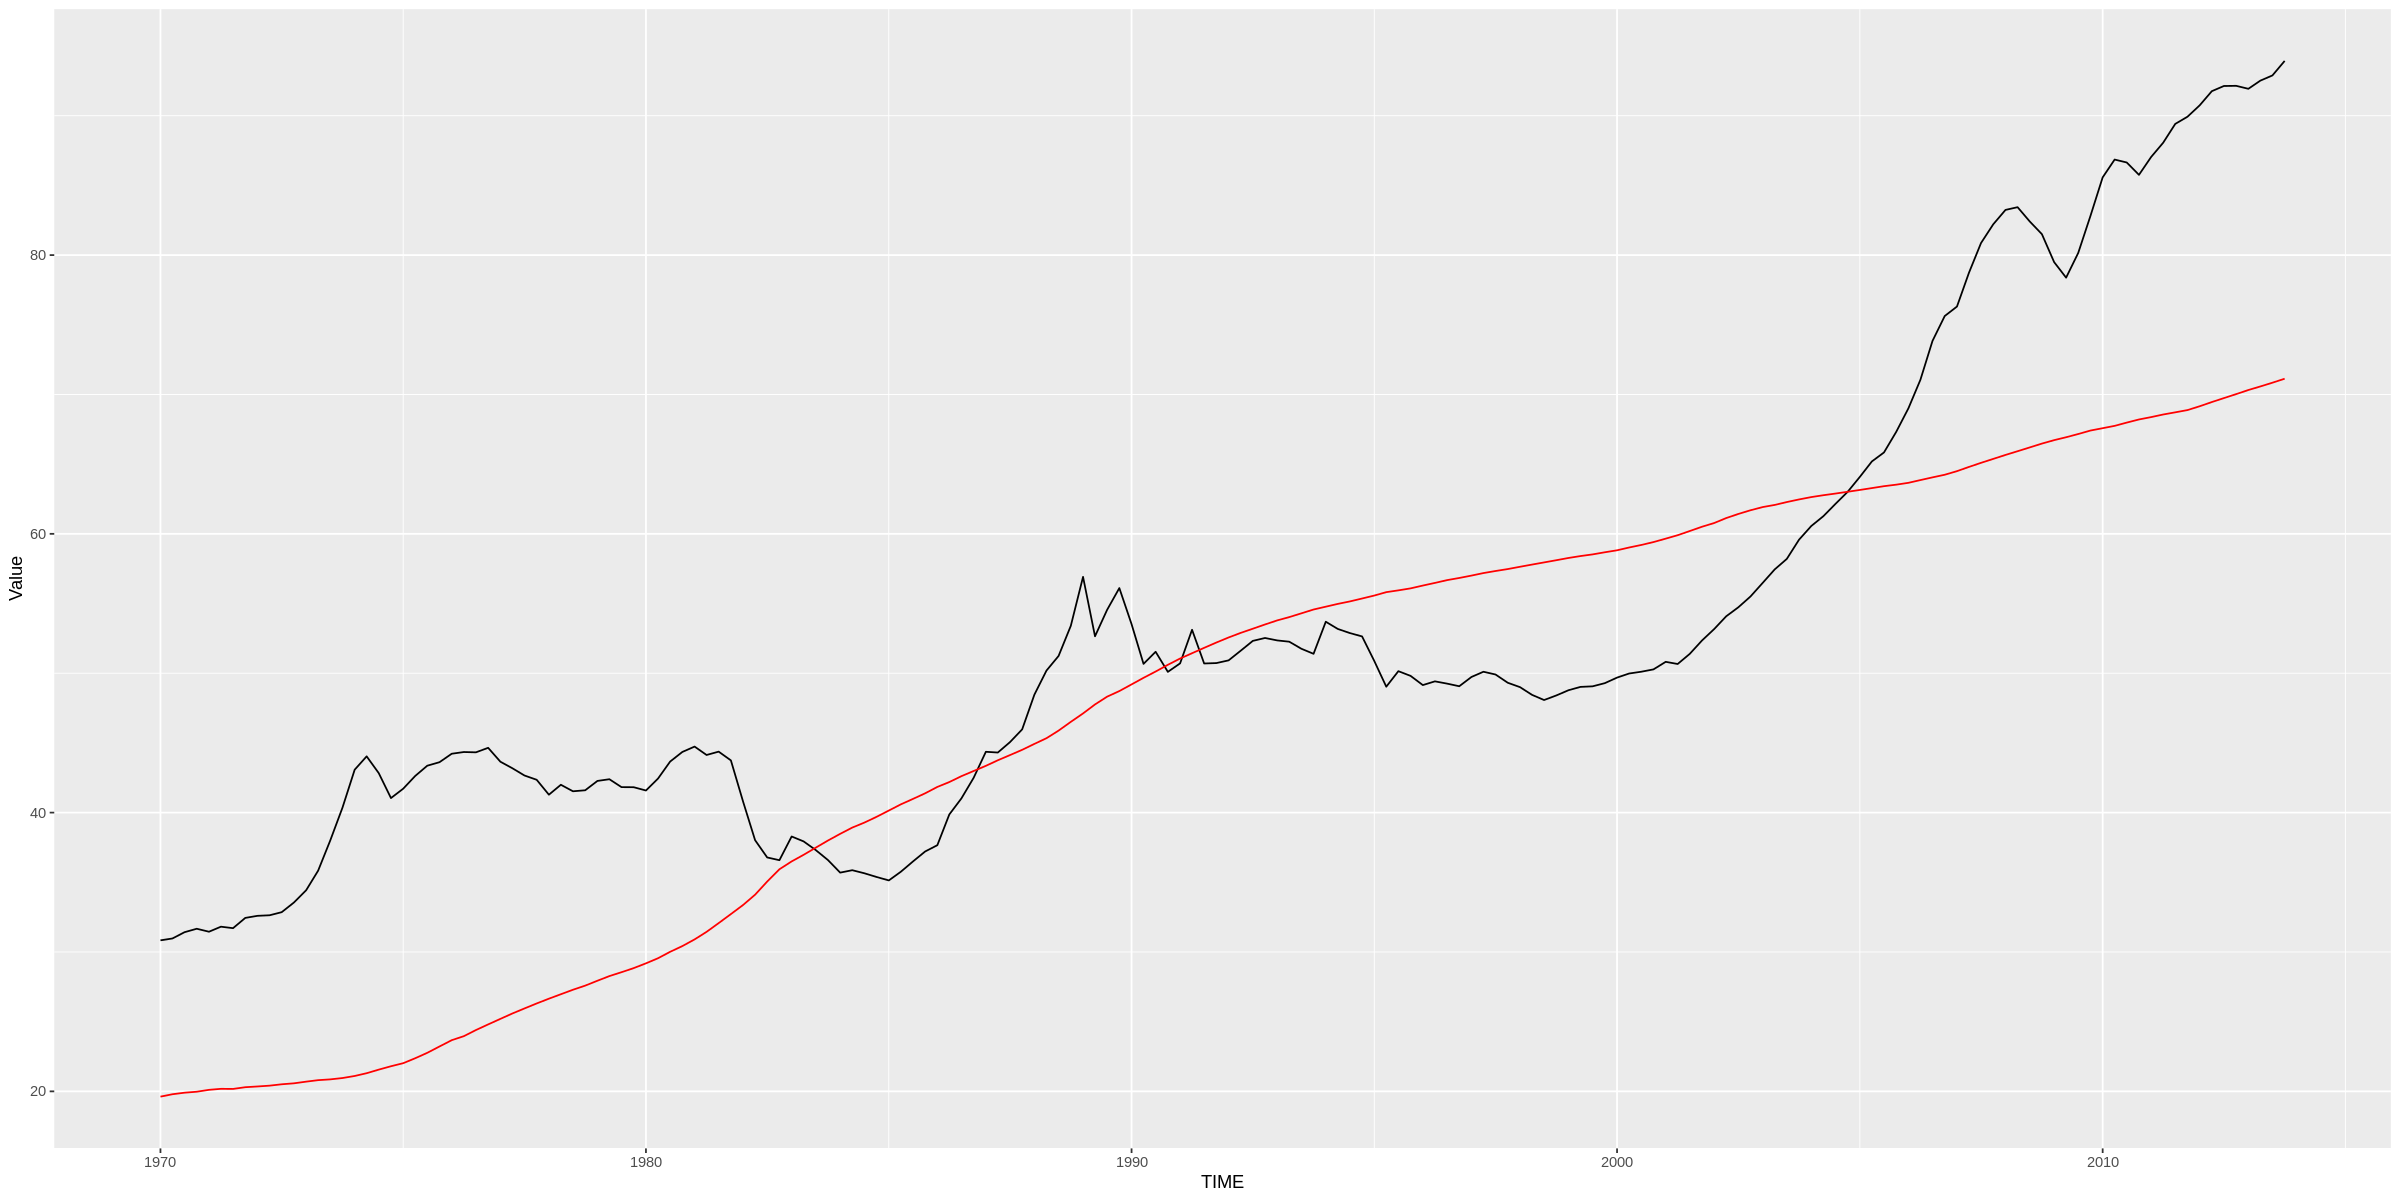

In [266]:
options(repr.plot.width = 20, repr.plot.height = 10)
ggplot(df_real_can, aes(x = TIME, y = Value)) + geom_line(colour = "black") + geom_line(aes(x = TIME, y = Fundam), color = "red") + scale_x_date()

In [267]:
df_var_y <- (df_real_us$Value - df_real_us$Fundam)/df_real_us$Fundam
df_var_p <- df_real_us$Value
df_var_p_star <- df_real_us$Fundam
df_control <- df_intrest$Value
data <- data.frame(df_var_y, df_var_p, df_var_p_star)

In [268]:
fit <- cusp(y ~ df_var_y, alpha ~ df_var_p, beta ~ df_var_p_star, data)

In [269]:
fit


Call:  cusp(formula = y ~ df_var_y, alpha = alpha ~ df_var_p, beta = beta ~      df_var_p_star, data = data) 

Coefficients:
  a[(Intercept)]       a[df_var_p]    b[(Intercept)]  b[df_var_p_star]  
         4.58950          -0.07343           0.51331           0.06722  
  w[(Intercept)]       w[df_var_y]  
        -2.71103           1.77428  

Degrees of Freedom: 175 Total (i.e. Null);  170 Residual
Null Deviance:	    400 
Delay Deviance:	 43.81 	AIC: 34.17 

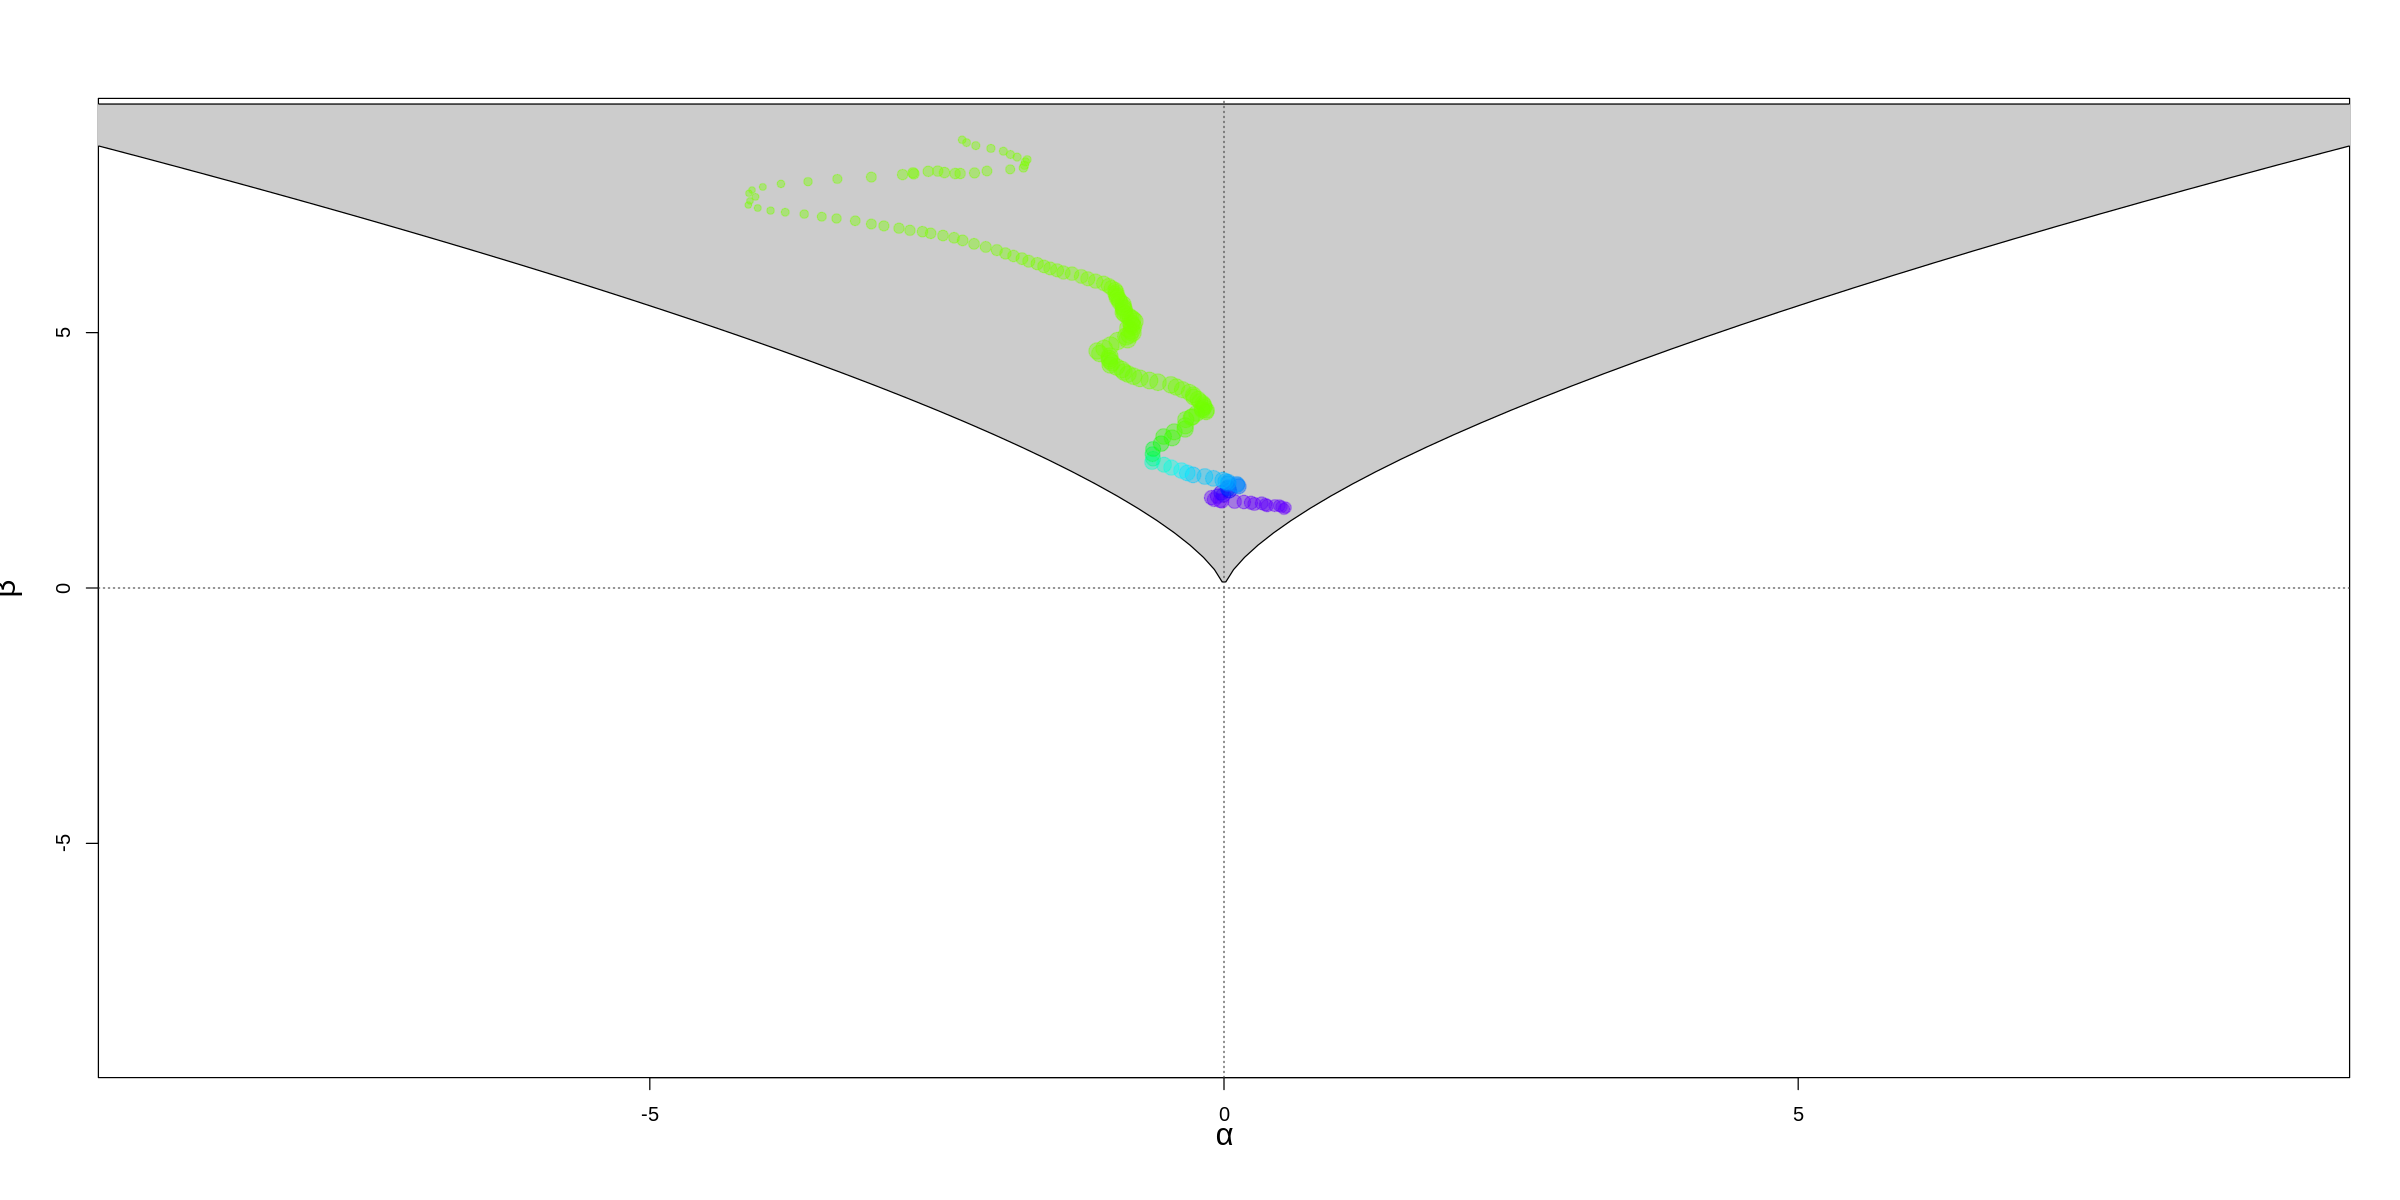

In [270]:
plot(fit, what = c("bifurcation"))

In [271]:
df_var_y <- (df_real_can$Value - df_real_can$Fundam)/df_real_can$Fundam
df_var_p <- df_real_can$Value
df_var_p_star <- df_real_can$Fundam
df_control <- df_intrest$Value
data <- data.frame(df_var_y, df_var_p, df_var_p_star)

In [272]:
fit <- cusp(y ~ df_var_y, alpha ~ df_var_p, beta ~ df_var_p_star, data)

In [273]:
fit


Call:  cusp(formula = y ~ df_var_y, alpha = alpha ~ df_var_p, beta = beta ~      df_var_p_star, data = data) 

Coefficients:
  a[(Intercept)]       a[df_var_p]    b[(Intercept)]  b[df_var_p_star]  
        -11.3366            0.1196           -4.8361            0.1435  
  w[(Intercept)]       w[df_var_y]  
         -2.3308            1.5107  

Degrees of Freedom: 175 Total (i.e. Null);  170 Residual
Null Deviance:	    41.34 
Delay Deviance:	 14.31 	AIC: 309.2 

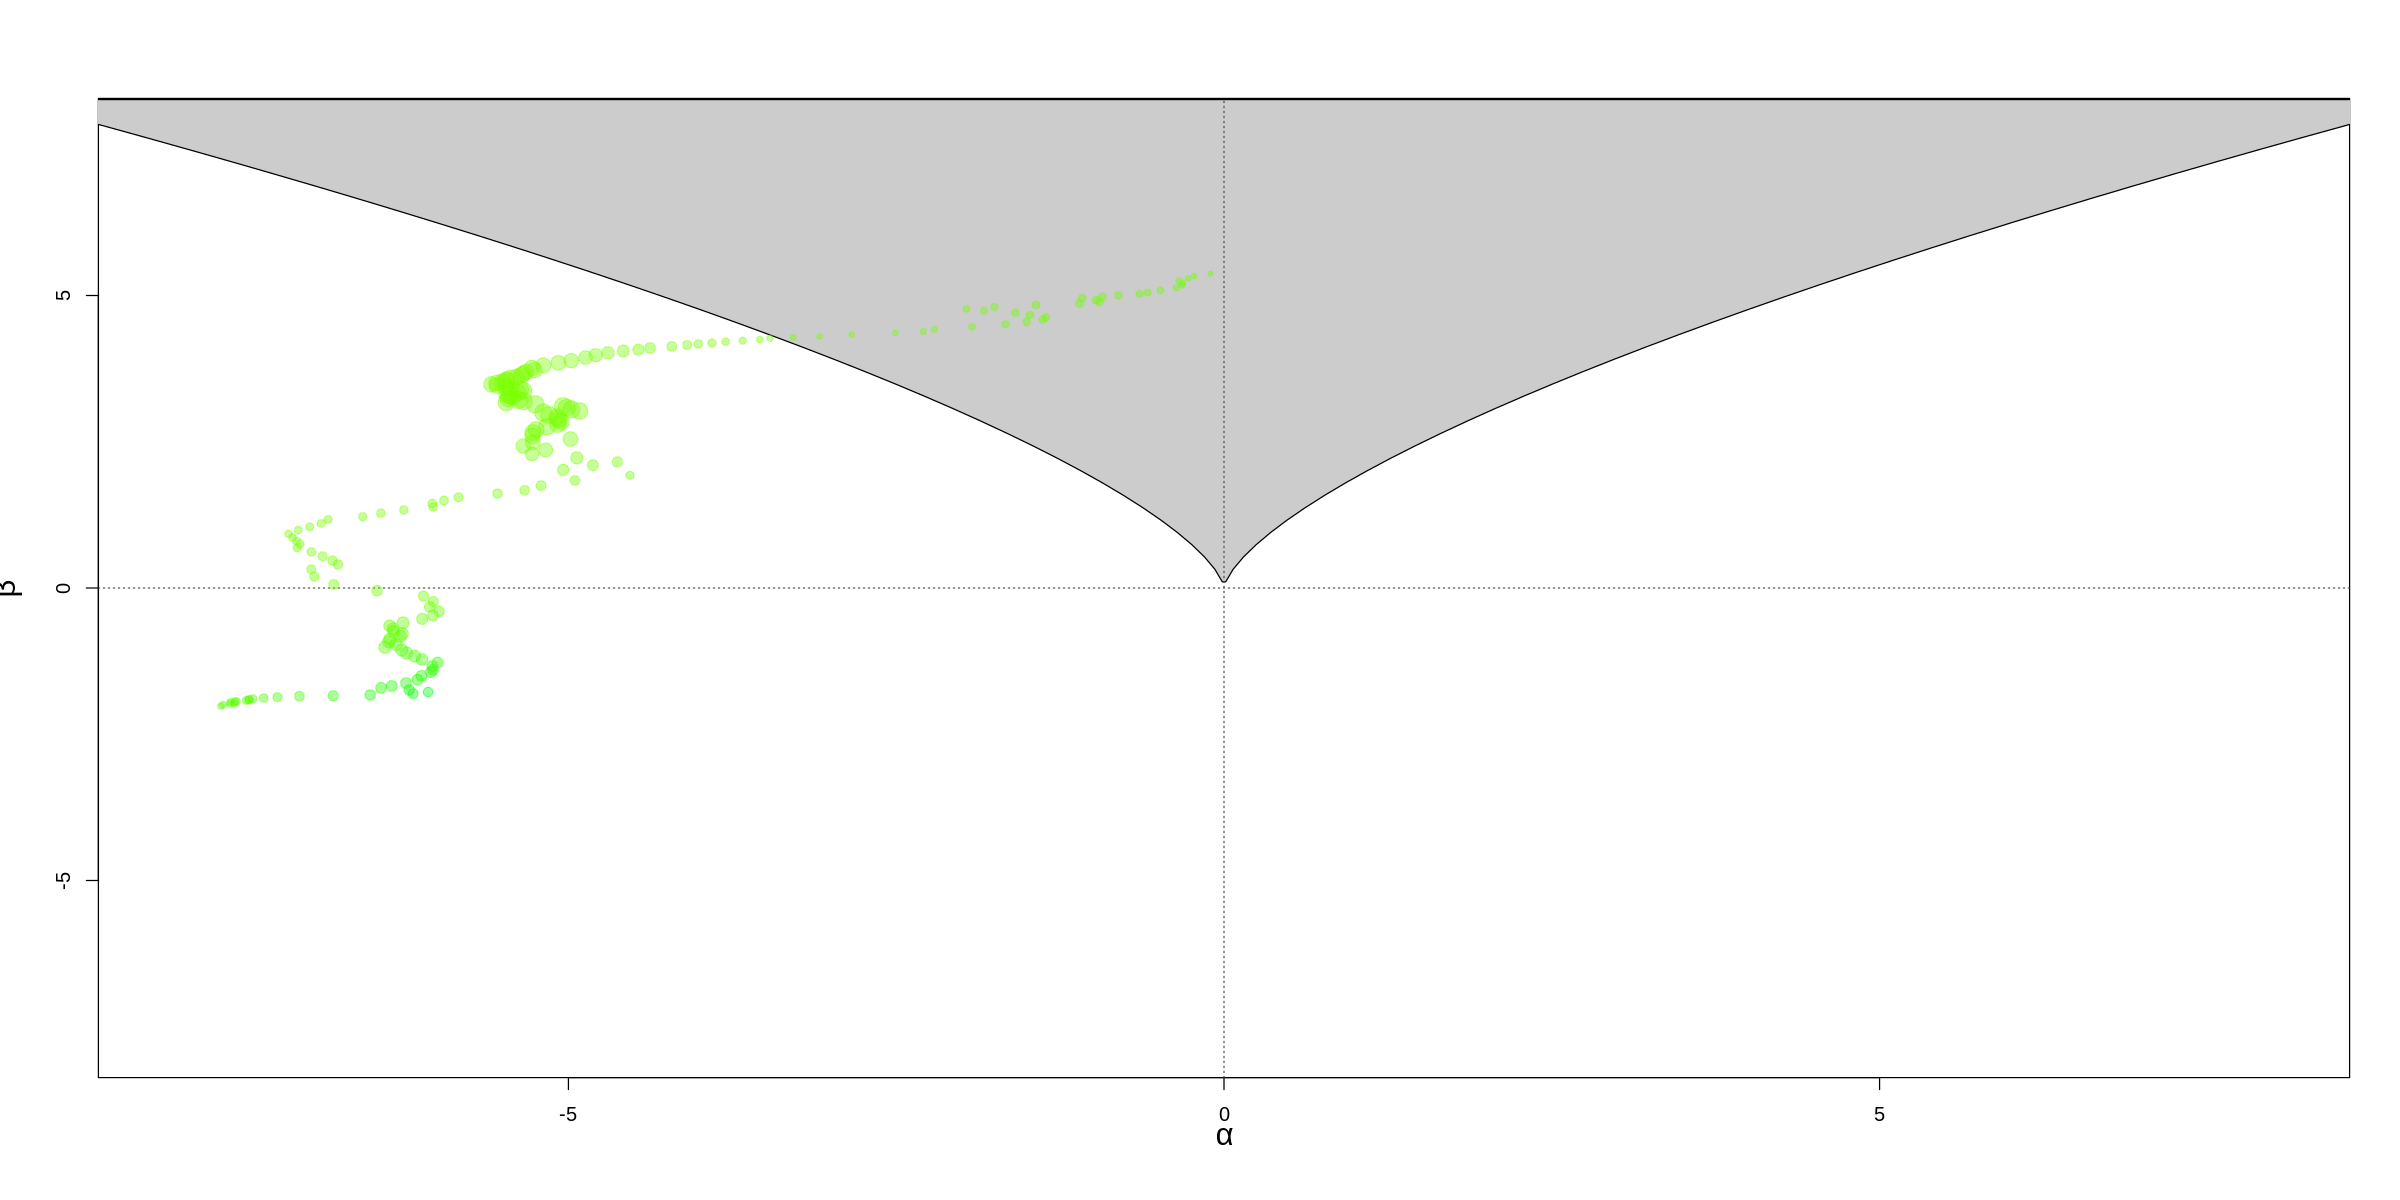

In [274]:
plot(fit, what = c("bifurcation"))